In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [22]:
def load_images(folder_path, label):
    features = []
    labels = []
    filenames = []
    for fname in os.listdir(folder_path):
        path = os.path.join(folder_path, fname)
        img = load_img(path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        feature = vgg.predict(img_array)
        feature = feature.flatten()

        features.append(feature)
        labels.append(label)
        filenames.append(fname)

    return np.array(features), np.array(labels), filenames

In [23]:
defect_dir = '/content/drive/MyDrive/DatasetAI1/Defect'
non_defect_dir = '/content/drive/MyDrive/DatasetAI1/NonDefect'

X_defect, y_defect, filenames_defect = load_images(defect_dir, 1)
X_nondefect, y_nondefect, filenames_nondefect = load_images(non_defect_dir, 0)

X = np.concatenate((X_defect, X_nondefect), axis=0)
y = np.concatenate((y_defect, y_nondefect), axis=0)
filenames = filenames_defect + filenames_nondefect

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(
    X, y, filenames, test_size=0.2, stratify=y, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Model: SVM
Akurasi  : 0.9868
Precision: 0.9857
Recall   : 0.9857
F1-Score : 0.9857


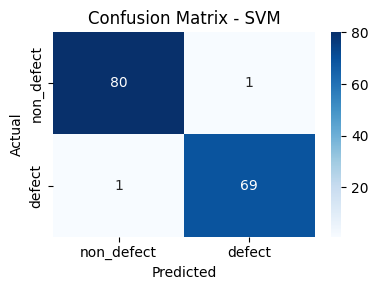


Model: Decision Tree
Akurasi  : 0.9801
Precision: 0.9855
Recall   : 0.9714
F1-Score : 0.9784


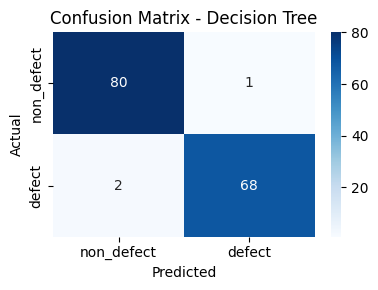


Model: Random Forest
Akurasi  : 0.9868
Precision: 0.9857
Recall   : 0.9857
F1-Score : 0.9857


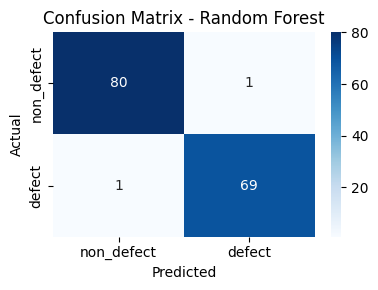


Model: KNN
Akurasi  : 0.9735
Precision: 1.0000
Recall   : 0.9429
F1-Score : 0.9706


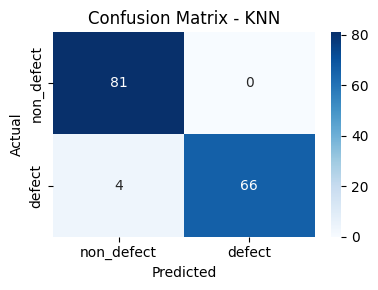

In [36]:
models = {
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

results = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    y_true_all = []
    y_pred_all = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)

    acc = accuracy_score(y_true_all, y_pred_all)
    prec = precision_score(y_true_all, y_pred_all)
    rec = recall_score(y_true_all, y_pred_all)
    f1 = f1_score(y_true_all, y_pred_all)
    cm = confusion_matrix(y_true_all, y_pred_all)

    results[model_name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    print(f"Akurasi  : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['non_defect', 'defect'],
                yticklabels=['non_defect', 'defect'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()